In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network3 as model
from utils.metrics import metric
import utils.optimizer_ as opt

In [5]:
net = model.MyLstmModel()

In [11]:
opt_ = opt.Optimizer(optimizer_name='SGD', lr_sch=False, learning_rate=0.05, momentum=0.9 ,clipnorm=0.0, clipvalue=0.5 , decay=0)
net.compile(optimizer=opt_.optimizer_choose(), loss='categorical_crossentropy', metrics=metric())

In [12]:
from tensorflow.keras import callbacks
import datetime
logdir = os.path.join("../tensorboard", datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network3"))
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [13]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

0.6165 - val_auc: 0.5644
Epoch 5/40
662/662 [==============================] - 25s 38ms/step - loss: 1.0934 - acc: 0.0000e+00 - tp: 195826.0000 - fp: 297753.0000 - tn: 379823.0000 - fn: 142962.0000 - categorical_accuracy: 0.5445 - categorical_crossentropy: 1.0934 - precision: 0.3967 - recall: 0.5780 - auc: 0.5778 - val_loss: 1.0959 - val_acc: 0.0000e+00 - val_tp: 89514.0000 - val_fp: 132762.0000 - val_tn: 157630.0000 - val_fn: 55682.0000 - val_categorical_accuracy: 0.6267 - val_categorical_crossentropy: 1.0959 - val_precision: 0.4027 - val_recall: 0.6165 - val_auc: 0.5644
Epoch 6/40
662/662 [==============================] - 24s 37ms/step - loss: 1.0933 - acc: 0.0000e+00 - tp: 196518.0000 - fp: 298823.0000 - tn: 378753.0000 - fn: 142270.0000 - categorical_accuracy: 0.5445 - categorical_crossentropy: 1.0933 - precision: 0.3967 - recall: 0.5801 - auc: 0.5780 - val_loss: 1.0959 - val_acc: 0.0000e+00 - val_tp: 89514.0000 - val_fp: 132762.0000 - val_tn: 157630.0000 - val_fn: 55682.0000 - va

In [14]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  129604.0
TruePositives result:  554.0
FalseNegatives result:  74696.0
FalsePositives result:  2568.0
Recall result:  0.0073621264
Precision result:  0.17745036


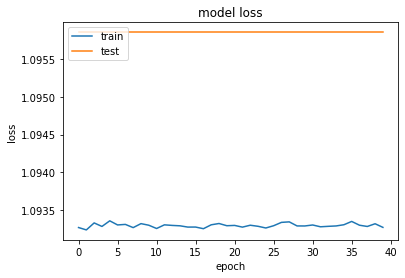

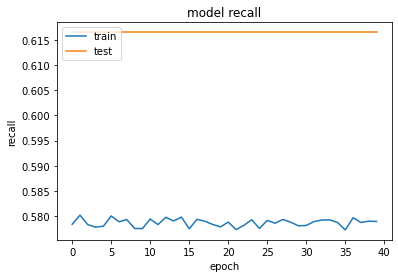

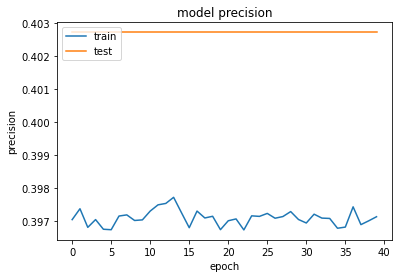

KeyError: 'lr'

In [16]:
import utils.graph as fig
fig.loss_graph(model_)
fig.recall_graph(model_)
fig.precision_graph(model_)
# fig.lr_graph(model_)